# Formal Theory
---
Missing value Treatment is an essential step in data preprocessing  to ensure the quality and accuracy of your analysis or machine learning Models. There are several strategies for handling missing values , and the choice depends on the nature of your data and the underlying statistical Concepts.

Nature of Data refers to
---
Normal Distribution vs Non Normal Distribution.

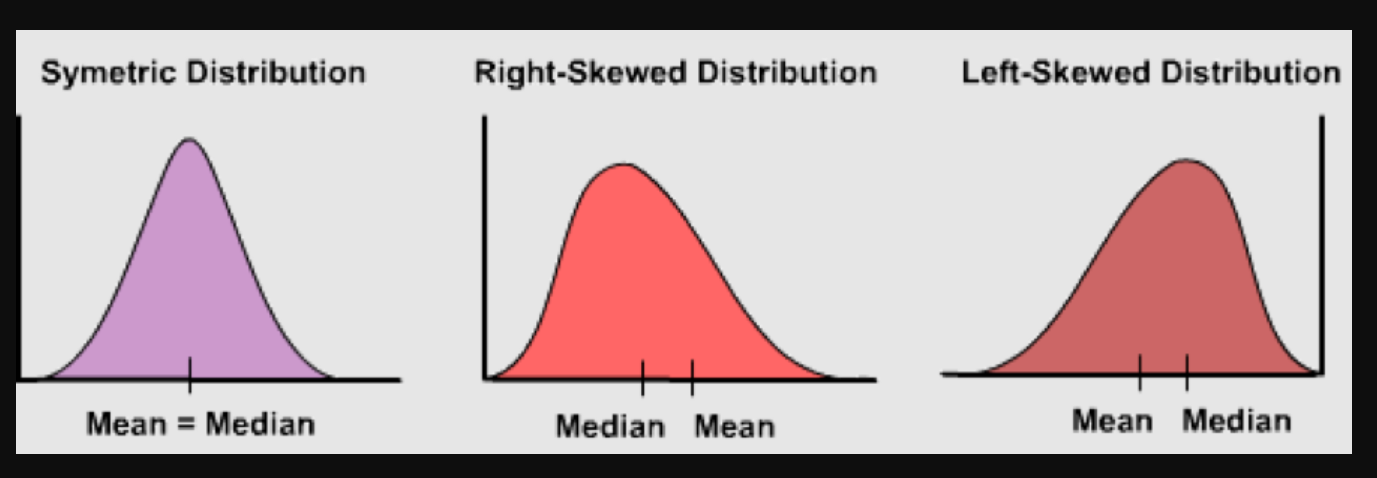

# eg. considering students information
---

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings(action='ignore')

```
<span style='color:green'>
note: in order to keep the facts/learnings/points measurable/understandable small size datasets are used for all labs.

In [ ]:
# here is the sample data

data ={
    'Name': ['Alice','Bob','Charlie','David','Emily'],
    'Age':[20 ,np.nan, 22, 19 , 21 ],
    'Score' : [85 , 90 , np.nan,78,np.nan]
}

In [ ]:
# let us prepare a dataframe

df = pd.DataFrame( data )

In [ ]:
df

,Name,Age,Score
0,Alice,20.0,85.0
1,Bob,NaN,90.0
2,Charlie,22.0,NaN
3,David,19.0,78.0
4,Emily,21.0,NaN


# Let us observe the various startegies to handle the missing value Treatment.

# Method 1 : Removing Missing Values
---
when to use this method : This is suitable when the missing values are relatively small in number and do not introduce any significant bias.

In [ ]:
df.isna().sum()

Name     0
Age      1
Score    2
dtype: int64

In [ ]:
# what is the %age occupancy of missing values in Age and Score column ?

In [ ]:
100 * ( df.isna().sum() / len(df) )

Name      0.0
Age      20.0
Score    40.0
dtype: float64

# Observations
---
1. there are 20% missing values in Age Column
2. There are 40% missing values in Score column.

In [ ]:
# obviously removing 40% or 20% data won't make any sense but in actual dataset if the missing %age < 1% say 0.021 or 0.1 then
# you can decide to remove Missing values

df_cleaned = df.dropna()

In [ ]:
df_cleaned

,Name,Age,Score
0,Alice,20.0,85.0
3,David,19.0,78.0


In [ ]:
df_cleaned.isna().sum()

Name     0
Age      0
Score    0
dtype: int64

# Method 2 : Imputing with Mean / Median
---
When to use this method  : This is suitable when the missing values are missing at  Random and the data is Normally Distributed.

In [ ]:
df

,Name,Age,Score
0,Alice,20.0,85.0
1,Bob,NaN,90.0
2,Charlie,22.0,NaN
3,David,19.0,78.0
4,Emily,21.0,NaN


In [ ]:
# trying to Imptue values in Age Column.
# question: is the data of Age column is Normally Distributed ?

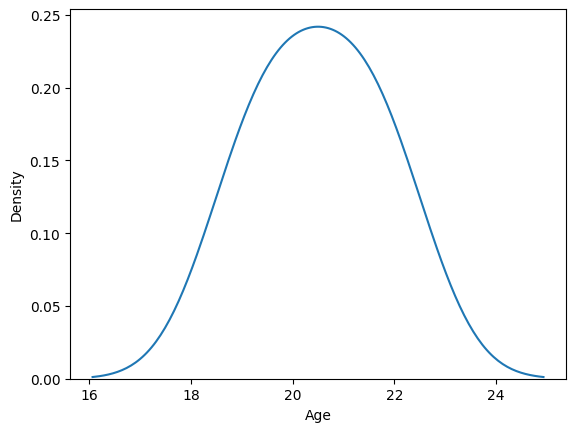

In [ ]:
sns.distplot( df['Age'],hist=False);

In [ ]:
# there is second approach also , by checking skew Measure

In [ ]:
df.Age.skew()

0.0

For skewness values between -0.5 and 0.5, the data exhibit approximate symmetry.
Skewness values within the range of -1 and -0.5 (negative skewed) or 0.5 and 1(positive skewed) indicate slightly skewed data distributions.
Data with skewness values less than -1 (negative skewed) or greater than 1 (positive skewed) are considered highly skewed.

# Please note: when the data is Normally Distributed , the Mean and Median will be same or very close to each other.

In [ ]:
# find the mean/median of Age column.

In [ ]:
df.Age.mean()

20.5

In [ ]:
df.Age.median()

20.5

In [ ]:
# hence in this case you can use any mean or median to impute the NaN values.

# Quick Activity : Find out if the Score is Normally Distributed ?

# What the skew value  for Score Column ?

# what is the mean/median for Score Column ?

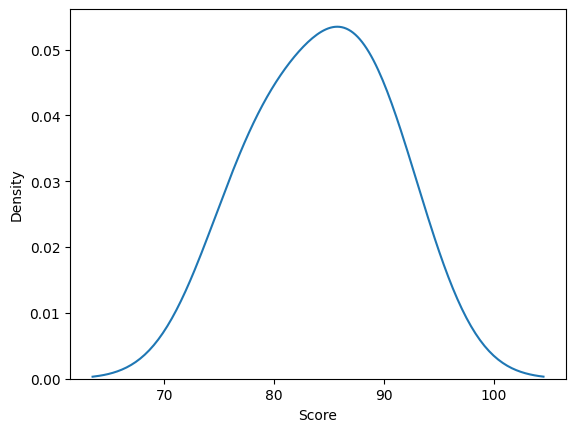

In [ ]:
sns.distplot(df['Score'],hist=False);

In [ ]:
# imputing the values

df_imputed = df.fillna( {'Age' : df.Age.mean() , 'Score' : df.Score.mean()})

In [ ]:
df_imputed

,Name,Age,Score
0,Alice,20.0,85.000000
1,Bob,20.5,90.000000
2,Charlie,22.0,84.333333
3,David,19.0,78.000000
4,Emily,21.0,84.333333


## Method 3:  Imputing with Mode
---
when to use this method : for Categorical Variables you can fill the Missing values using Mode. (i.e most frequent values)

In [ ]:
# here is a sample data.

data= {
    'Gender' : ['Female','Male','Female',np.nan,'Female','Male','Male'],
    'Age' :[ 20, 21, 22, 19, np.nan,19,21]
}

df= pd.DataFrame( data )

In [ ]:
df.Gender.mode()

0    Female
1      Male
Name: Gender, dtype: object

In [ ]:
df

,Gender,Age
0,Female,20.0
1,Male,21.0
2,Female,22.0
3,NaN,19.0
4,Female,NaN


In [ ]:
# target column: Gender

In [ ]:
df.Gender.mode()

0    Female
Name: Gender, dtype: object

In [ ]:
df.Gender.mode()[0]

'Female'

In [ ]:
df_categorical_imputed = df.fillna( {'Gender': df.Gender.mode()[0]})

In [ ]:
df_categorical_imputed

,Gender,Age
0,Female,20.0
1,Male,21.0
2,Female,22.0
3,Female,19.0
4,Female,NaN


# Method 4 :  Interpolation
---
when to use interpolation : when there is pattern in data.


In [ ]:
# here is the sample data

data ={
    'Name': ['Alice','Bob','Charlie','David','Emily'],
    'Age':[20 ,np.nan, 22, 19 , 21 ],
    'Score' : [85 , 90 , np.nan,78,np.nan]
}

In [ ]:
df = pd.DataFrame( data )

In [ ]:
df

,Name,Age,Score
0,Alice,20.0,85.0
1,Bob,NaN,90.0
2,Charlie,22.0,NaN
3,David,19.0,78.0
4,Emily,21.0,NaN


In [ ]:
# Impute Missing values using linear interpolation

df_interpolated = df.interpolate()


In [ ]:
df_interpolated

,Name,Age,Score
0,Alice,20.0,85.0
1,Bob,21.0,90.0
2,Charlie,22.0,84.0
3,David,19.0,78.0
4,Emily,21.0,78.0


In [ ]:
# here is a sample data.

data= {
    'Gender' : ['Female','Male','Female',np.nan,'Female','Male','Male','Female'],
    'Age' :[ 10, 20, 30, np.nan, 50,np.nan,70,80]
}

df= pd.DataFrame( data )

In [ ]:
df

,Gender,Age
0,Female,10.0
1,Male,20.0
2,Female,30.0
3,NaN,NaN
4,Female,50.0
5,Male,NaN
6,Male,70.0
7,Female,80.0


In [ ]:
df_interpolated = df.interpolate()

In [ ]:
df_interpolated

,Gender,Age
0,Female,10.0
1,Male,20.0
2,Female,30.0
3,NaN,40.0
4,Female,50.0
5,Male,60.0
6,Male,70.0
7,Female,80.0


# Revision Exercise
---

Suggest the Best Value to Impute NaN

In [ ]:
data = {'values' :[ 10,15,20,np.nan,25,30,35,40]}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,values
0,10.0
1,15.0
2,20.0
3,NaN
4,25.0
5,30.0
6,35.0
7,40.0


In [ ]:
df['values'].skew()

0.0

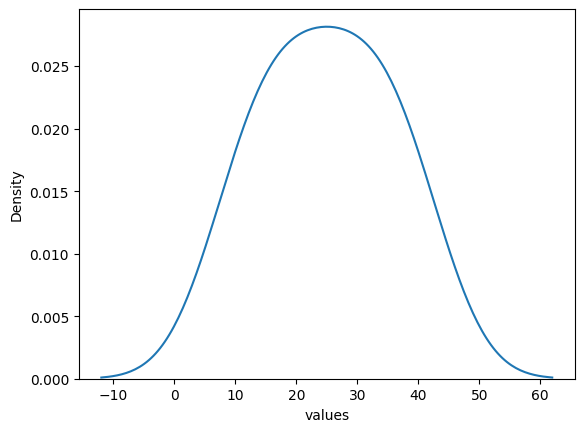

In [ ]:
sns.distplot(df['values'],hist=False);

In [ ]:
# any mean/median will work as the data is normally distributed.

In [ ]:
df['values'].fillna(df['values'].mean(),inplace=True)

In [ ]:
df

,values
0,10.0
1,15.0
2,20.0
3,25.0
4,25.0
5,30.0
6,35.0
7,40.0


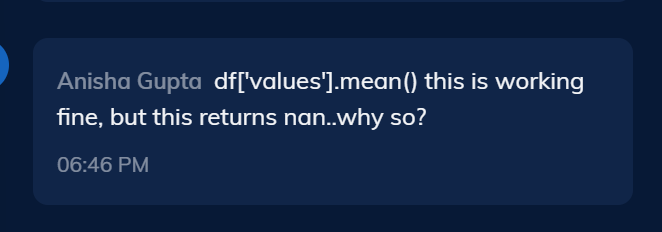

# Median Only (to impute NaN)
---
when to use Median Only : The Median is more robust to outliers than the mean , making it suitable when the data is skewed or contains outliers.

In [ ]:
data = {'values' :[ 10,15,20,np.nan,25,30,35,40,500]}
df = pd.DataFrame(data)

In [ ]:
df

,values
0,10.0
1,15.0
2,20.0
3,NaN
4,25.0
5,30.0
6,35.0
7,40.0
8,500.0


In [ ]:
# please check if  values is normally distributed ?
# do you see any outlier in the data ?

# does presence of outlier affects MEAN ?

In [ ]:
df['values'].skew()

2.8084625307570823

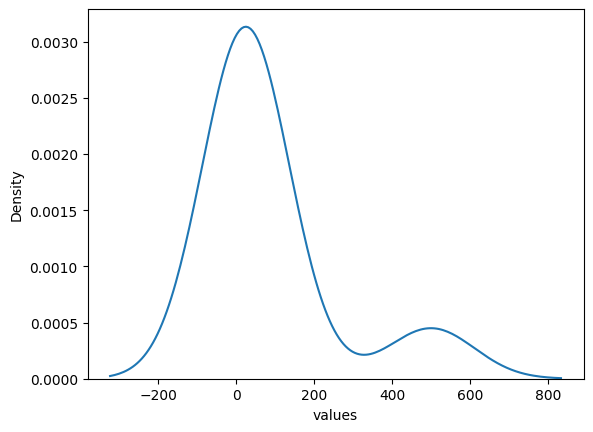

In [ ]:
sns.distplot(df['values'],hist=False);

In [ ]:
# do you see any outlier in the data ?

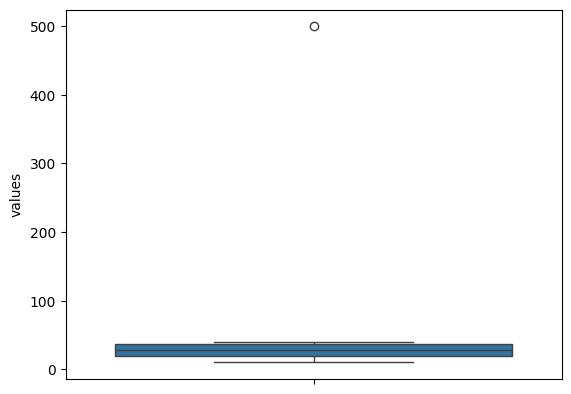

In [ ]:
sns.boxplot(df['values']);

In [ ]:
# we saw that the data is non normally distributed ?

In [ ]:
# is the mean or median of data (i.e values) is same ?

In [ ]:
df['values'].mean()

84.375

In [ ]:
df['values'].median()

27.5

In [ ]:
# because we have outlier present in data , and we know that outlier affects mean hence
# median is the only and best choice to impute NaN values.

In [ ]:
df['values'].fillna(df['values'].median(),inplace=True)

In [ ]:
df

,values
0,10.0
1,15.0
2,20.0
3,27.5
4,25.0
5,30.0
6,35.0
7,40.0
8,500.0


# IQR
---
The Interquartile Range is a Statistical Concept used to measure spread or Dispersion of Data.

## Quartiles
---
<pre>
Quartiles Divide a dataset into four parts , each containing an equal number of observations.

Q1 - Quartile1
Q2 - Quartile2
Q3 - Quartile 3
---
IQR is the difference of Q3 and Q1  , it measures the spread of the middle 50% of the Data.

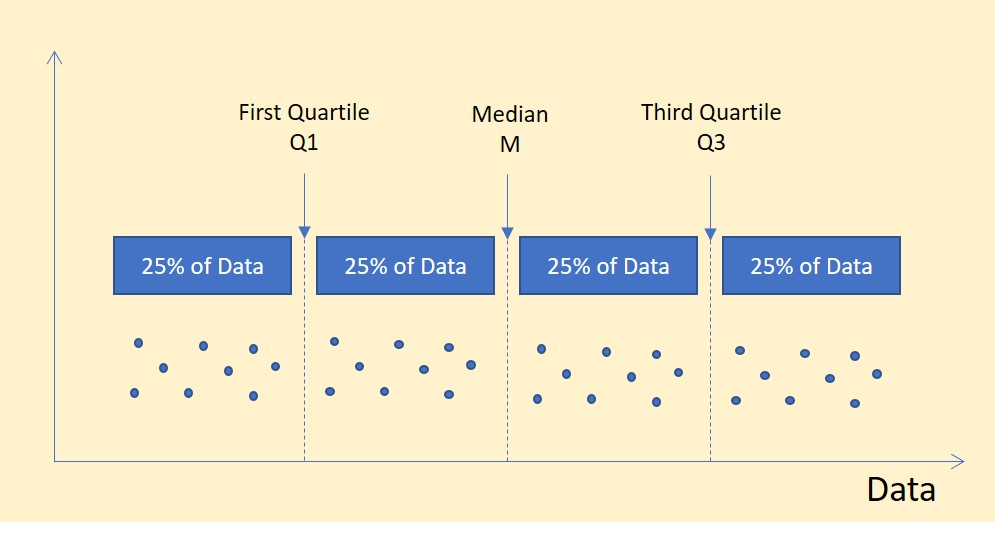

In [ ]:
# Here is a sample data

data = {'scores' : [62 , 75, 80 , 85, 92 , 98 , 102,110 , 115 , 130]}

In [ ]:
df  = pd.DataFrame(data)

In [ ]:
df

,scores
0,62
1,75
2,80
3,85
4,92
5,98
6,102
7,110
8,115
9,130


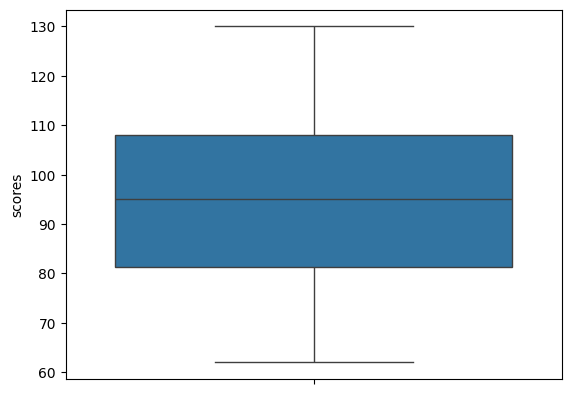

In [ ]:
# first lets plot the boxplot

sns.boxplot(df['scores']);

In [ ]:
# Finding the First Quartile

Q1 = df['scores'].quantile(0.25)
Q1

81.25

In [ ]:
Q2 = df['scores'].quantile(0.5)   # Q2 is also identified as Median
Q2

95.0

In [ ]:
Q3 = df['scores'].quantile(0.75)
Q3

108.0

In [ ]:
# Formula to find the IQR is

# IQR = Q3 - Q1

IQR  = Q3 - Q1
IQR

26.75

In [ ]:
# here is the formula to calculate upper & lower bound

# upper_bound = Q3 + 1.5 * IQR

# lower_bound = Q1 - 1.5 * IQR

In [ ]:
upper_bound = Q3 + 1.5 * IQR
upper_bound

148.125

In [ ]:
lower_bound = Q1 - 1.5 * IQR
lower_bound

41.125

In [ ]:
# A Simple Approach to Determine if your data contains outliers

In [ ]:
df[ df['scores'] > 148]

,scores


In [ ]:
df [df['scores'] < 41]

,scores


# Handling Outliers
---
Formal theory:

Handling outl;ier is an important step in data pre processing to ensure that extreme values do not unduly influence your analysis.

# Method 1 : Removing Outliers
---
when to use this method: if outliers are likely due to data entry or human errors you might consider them (outliers) removing

In [ ]:
# Sample Data with outlier

data = {'TractorSpeed': [ 5, 10 ,15 ,20, 100,25, 30,35, 40]}
df = pd.DataFrame(data)

In [ ]:
df

,TractorSpeed
0,5
1,10
2,15
3,20
4,100
5,25
6,30
7,35
8,40


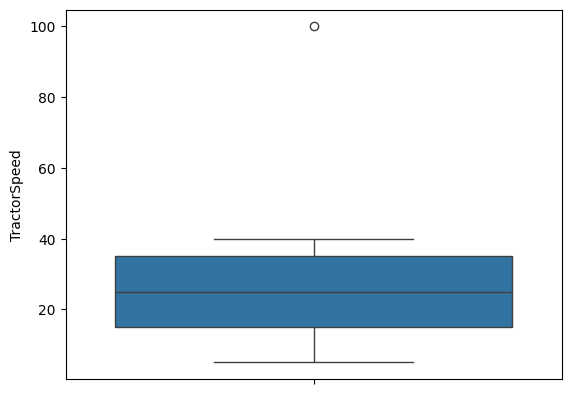

In [ ]:
sns.boxplot(df['TractorSpeed']);

In [ ]:
# at max a tractor can reach a speed of upto 60km/hr

In [ ]:
# let us define a threshold

threshold= 60

In [ ]:
# remove outliers from the dataframe

In [ ]:
df_filtered = df[df['TractorSpeed'] <= 60 ]

In [ ]:
df_filtered

,TractorSpeed
0,5
1,10
2,15
3,20
5,25
6,30
7,35
8,40


# Method 2 : Transforming Outliers
---

when to use this method : if outliers are valid data points but still affect your analysis. you can choose to transform them to reduce their impact.

In [ ]:
# Sample Data with outlier

data = {'TractorSpeed': [ 5, 10 ,15 ,20, 100,25, 30,35, 40]}
df = pd.DataFrame(data)

In [ ]:
df

,TractorSpeed
0,5
1,10
2,15
3,20
4,100
5,25
6,30
7,35
8,40


In [ ]:
# Apply Log transformation to the Data


df['transformed_values'] = np.log1p(df['TractorSpeed'])

In [ ]:
df

,TractorSpeed,transformed_values
0,5,1.791759
1,10,2.397895
2,15,2.772589
3,20,3.044522
4,100,4.615121
5,25,3.258097
6,30,3.433987
7,35,3.583519
8,40,3.713572


# Winsorization :
---
Winsorization involves capping extreme values to a specified percentile.


In [ ]:
# Sample Data with outlier

data = {'TractorSpeed': [ 5, 10 ,15 ,20, 100,25, 30,35, 40]}
df = pd.DataFrame(data)

In [ ]:
df

,TractorSpeed
0,5
1,10
2,15
3,20
4,100
5,25
6,30
7,35
8,40


In [ ]:
# let us define the percentile limits ** eg. 5th and 95th percentile


lower_limit = np.percentile( df['TractorSpeed'],5)
upper_limit = np.percentile( df['TractorSpeed'],95)

In [ ]:
lower_limit

7.0

In [ ]:
upper_limit

75.99999999999997

In [ ]:
# any Speed <7 will change to 7
# any Speed > 75.99 will change to 75.99

In [ ]:
df['winsorized_values'] = np.clip(df['TractorSpeed'], lower_limit,upper_limit)

In [ ]:
df

,TractorSpeed,winsorized_values
0,5,7
1,10,10
2,15,15
3,20,20
4,100,76
5,25,25
6,30,30
7,35,35
8,40,40


# Final Summary :
---
Remember , the choice of handling method dpeends on the nature of data and the goals of your analysis, its essential to understand the context and the reasons behind mising values / outlier treatment before deciding how to handle them.